# Detect chessboard

In [1]:
import multicam_calibration as mcc
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

In [3]:
import subprocess

video = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.avi.avi"
output_path = str(Path(video).with_name(Path(video).stem.replace('.avi.avi', '')+ 'encoded.mp4'))
            #output_path = video.replace('.avi.avi', 'encoded.mp4')
print(f'Encoding video: {video}')

subprocess.run(['ffmpeg', '-y', '-i', video, '-c:v', 'libx264', '-pix_fmt', 'yuv420p', '-preset', 'superfast', '-crf', '23', output_path], check=True)
print(f'Encoded video: {output_path}')

Encoding video: D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.avi.avi
Encoded video: D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.aviencoded.mp4


Processing D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.aviencoded.mp4


100%|█████████████████████████| 12142/12142 [01:13<00:00, 165.07frame/s]


Processing D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-bottom.aviencoded.mp4


100%|█████████████████████████| 12142/12142 [00:36<00:00, 330.51frame/s]


Processing D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-left.aviencoded.mp4


100%|█████████████████████████| 12142/12142 [00:36<00:00, 333.73frame/s]


Processing D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-right.aviencoded.mp4


100%|█████████████████████████| 12142/12142 [00:37<00:00, 324.70frame/s]


Processing D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-top.aviencoded.mp4


100%|█████████████████████████| 12142/12142 [00:36<00:00, 333.73frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_central.aviencoded.overlay-0-12142.mp4


100%|█████████████████████████| 12142/12142 [00:27<00:00, 435.17frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-bottom.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:09<00:00, 1218.16frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-left.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1114.33frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-right.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1153.73frame/s]


Saving to D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906\multicam_video_2024-08-01T18_03_33_mirror-top.aviencoded.overlay-0-12142.mp4


100%|████████████████████████| 12142/12142 [00:10<00:00, 1207.69frame/s]


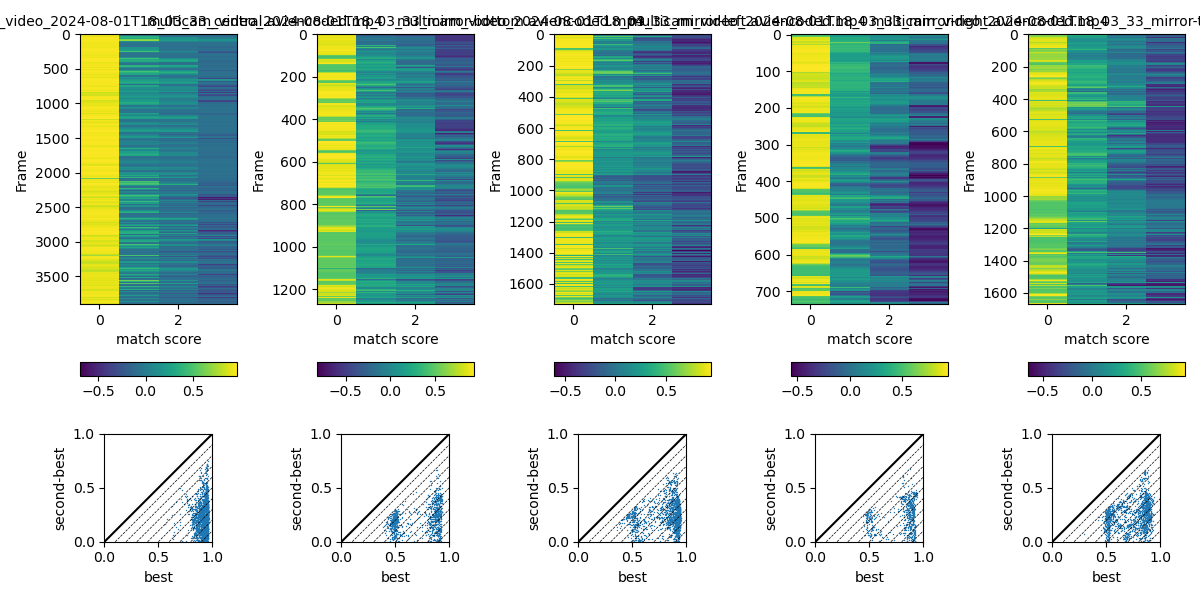

In [4]:
board_shape = (5,7)
square_size = 12.5

# camera_names = ['top', 'side1', 'side2', 'side3', 'side4', 'bottom']
# prefix = '../../tests/example_data/example_calibration'
#data_dir = Path("/Users/vigji/Desktop/dest_dir/18042024")  # /Calibration/Basler_acA1440-220um__40075240__20240418_180540771_cropped
data_dir = Path(r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240801\Calibration\multicam_video_2024-08-01T18_03_33_cropped_20240923170906")
#video_paths = sorted([f for f in (data_dir.glob("Calibration/*/*.mp4")) if "overlay" not in f.stem])[::-1]
#camera_names = [p.stem.split("_")[-1].split(".detections")[0] for p in video_paths] 

#video_paths = [str(f) for f in video_paths]
video_paths = [str(f) for f in data_dir.iterdir() if f.suffix == '.mp4']

# detect calibration object in each video
all_calib_uvs, all_img_sizes = mcc.run_calibration_detection(
    video_paths, mcc.detect_chessboard, n_workers=6,
    detection_options=dict(board_shape=board_shape, scale_factor=0.5))

# display a table with the detections shared between camera pairs
mcc.summarize_detections(all_calib_uvs)

# plot corner-match scores for each frame
fig = mcc.plot_chessboard_qc_data(video_paths)

# optionally generate overlay videos
for p in video_paths:
    mcc.overlay_detections(p)
fig.savefig(data_dir / "checkerboard_errors.png")

# Calibrate

In [5]:
!pip install flammkuchen

In [5]:
import os
import h5py
import flammkuchen as fl

qc_datas = []
for video_path in video_paths:
    detections_path = os.path.splitext(video_path)[0] + ".detections.h5"
    assert os.path.exists(detections_path), (
        f"Could not find {detections_path}. "
        "Run `run_calibration_detection` first."
    )
    with h5py.File(detections_path, "r") as h5:
        qc_datas.append(h5["qc_data"][:])

## Initialization

In [6]:
calib_objpoints = mcc.generate_chessboard_objpoints(board_shape, square_size)
s = slice(None, None)

all_extrinsics, all_intrinsics, calib_poses, spanning_tree = mcc.calibrate(
    all_calib_uvs[:, s, :, :], all_img_sizes, calib_objpoints, root=0, n_samples_for_intrinsics=100)
fig.savefig(data_dir / "shared_detections.png")


Estimating camera intrinsics


100%|████████████████████████████████████| 5/5 [12:32<00:00, 150.51s/it]


Initializing calibration object poses


100%|█████████████████████████████████████| 5/5 [00:02<00:00,  1.86it/s]


Estimating camera extrinsics
Merging calibration object poses


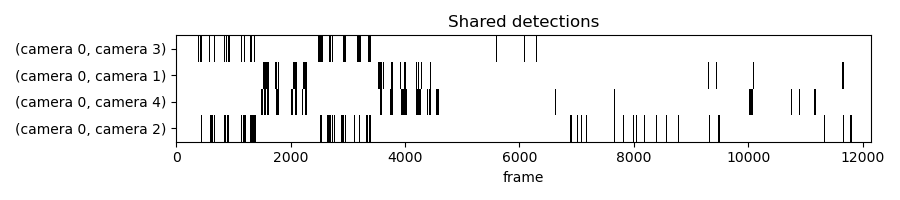

In [7]:
fig, shared_detections = mcc.plot_shared_detections(all_calib_uvs, spanning_tree)

In [8]:
valid = ((~np.isnan(all_calib_uvs[1, :, 0, 0]))&(~np.isnan(all_calib_uvs[0, :, 0, 0]))).astype(int)
np.sum(valid)

590

In [9]:
import tqdm
import cv2
n_cameras, n_frames, N, _ = all_calib_uvs.shape
median_error = np.zeros(n_cameras)
reprojections = np.zeros((n_cameras, n_frames, N, 2))
transformed_reprojections = np.zeros((n_cameras, n_frames, N, 2)) * np.nan
pts = mcc.embed_calib_objpoints(calib_objpoints, calib_poses)

errors_list = []
for cam in tqdm.trange(n_cameras):
    reprojections[cam] = mcc.project_points(
        pts, all_extrinsics[cam], all_intrinsics[cam][0]
    )
    uvs_undistorted = mcc.undistort_points(all_calib_uvs[cam], *all_intrinsics[cam])
    valid_ixs = np.nonzero(~np.isnan(uvs_undistorted).any((-1, -2)))[0]
    for t in valid_ixs:
        H = cv2.findHomography(uvs_undistorted[t], calib_objpoints[:, :2])
        transformed_reprojections[cam, t] = cv2.perspectiveTransform(
            reprojections[cam, t][np.newaxis], H[0]
        )[0]

    errors = np.linalg.norm(
        transformed_reprojections[cam, valid_ixs] - calib_objpoints[:, :2],
        axis=-1,
    )
    median_error[cam] = np.median(errors)
    errors_arr = np.zeros(n_frames)*np.nan
    errors_arr[valid_ixs] = np.median(errors, axis=1)
    errors_list.append(errors_arr)

100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


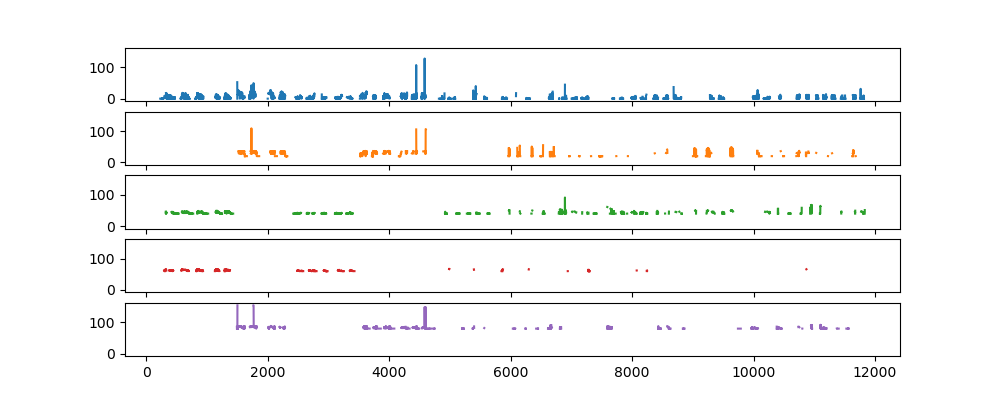

In [10]:
f, axs = plt.subplots(len(errors_list), 1, figsize=(10, 4), sharex=True, sharey=True)

for i, errors in enumerate(errors_list):
    axs[i].plot(errors + i*20, c=f"C{i}")
# plt.plot(errors_list[0].mean(1))

100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


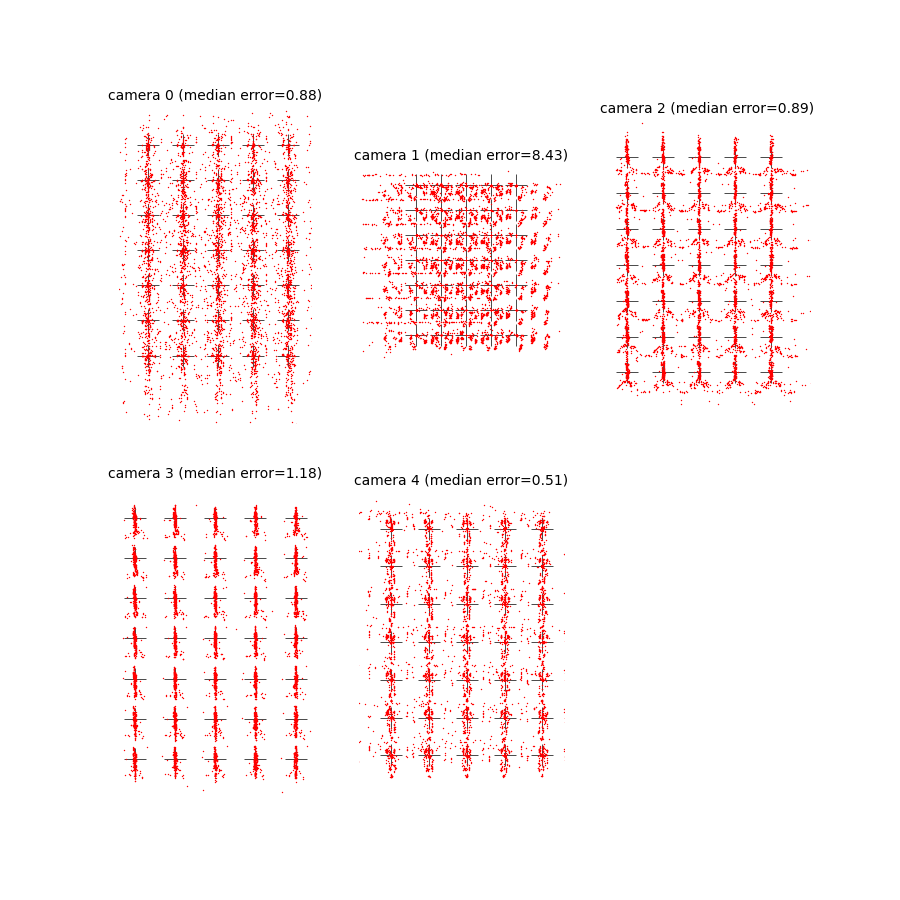

In [14]:
#    cam_names=['top', 'side1', 'side2', 'side3', 'side4', 'bottom'],
s = slice(0, None)
fig, median_error, reprojections, transformed_reprojections = mcc.plot_residuals(
    all_calib_uvs[:, s, :, :], all_extrinsics, all_intrinsics, calib_objpoints, calib_poses[s, :], 

    inches_per_axis=3)
fig.savefig(data_dir / "first_residuals.png")

## Bundle adjustment

In [15]:
adj_extrinsics, adj_intrinsics, adj_calib_poses, use_frames, result = \
    mcc.bundle_adjust(all_calib_uvs, all_extrinsics, all_intrinsics, calib_objpoints, calib_poses, n_frames=None, ftol=1e-4)

Excluding 201 out of 2155 frames based on an outlier threshold of 22.266031719390714
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0190e+06                                    3.15e+07    
       1              8         7.4657e+05      2.72e+05       7.00e+01       3.13e+07    
       2              9         5.1294e+05      2.34e+05       1.40e+02       3.36e+07    
       3             10         3.5269e+05      1.60e+05       8.85e+01       3.46e+07    
       4             11         2.5837e+05      9.43e+04       1.35e+02       1.75e+07    
       5             12         2.0484e+05      5.35e+04       1.81e+02       1.19e+07    
       6             13         1.7748e+05      2.74e+04       2.15e+02       5.28e+06    
       7             14         1.5771e+05      1.98e+04       2.48e+02       4.93e+06    
       8             15         1.5137e+05      6.35e+03       2.64e+02       2.24e+06    
     

100%|██████████| 5/5 [00:00<00:00,  6.15it/s]


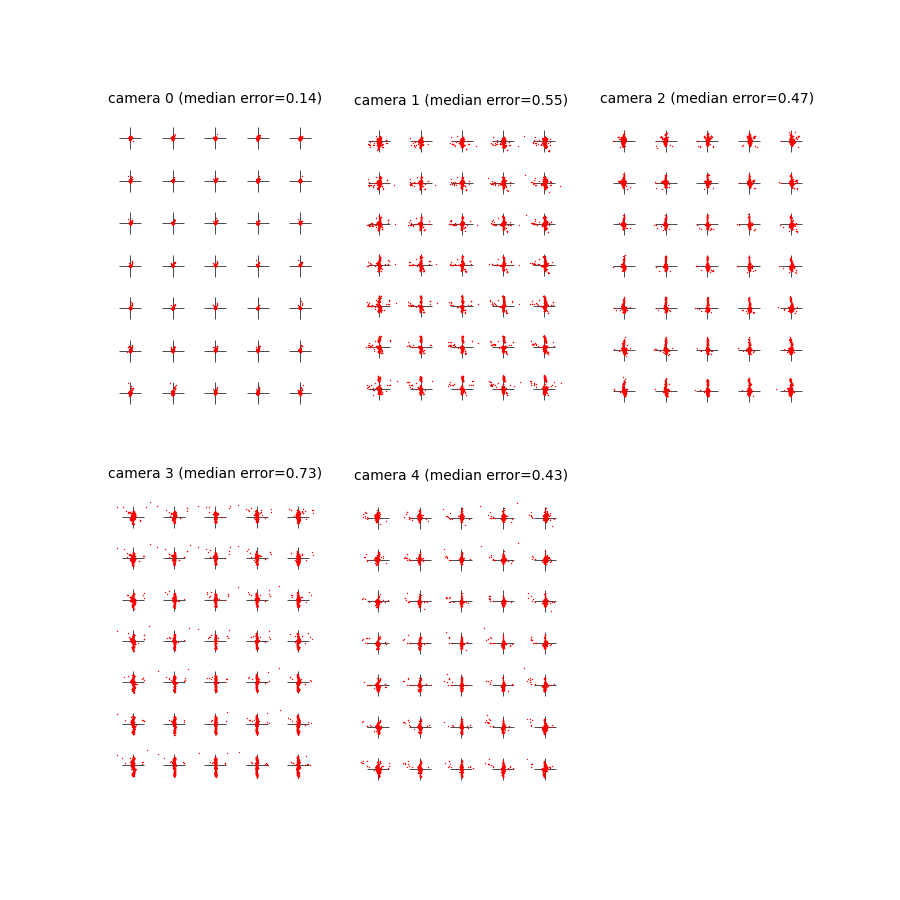

In [16]:
fig, median_error, reprojections, transformed_reprojections = mcc.plot_residuals(
    all_calib_uvs[:,use_frames], adj_extrinsics, adj_intrinsics, calib_objpoints, adj_calib_poses, inches_per_axis=3)
fig.savefig(data_dir / "refined_residuals.png")

In [17]:
adj_extrinsics, adj_intrinsics, adj_calib_poses, use_frames, result = \
    mcc.bundle_adjust(all_calib_uvs, adj_calib_poses, adj_intrinsics, calib_objpoints, adj_calib_poses, n_frames=5000, ftol=1e-4)

IndexError: index 2196 is out of bounds for axis 0 with size 2155

# Save results

In [31]:
cam_names=['top', 'side1', 'side2', 'side3', 'side4', 'bottom']
len(cam_names)

6

In [32]:
# save for JARVIS
camera_names = ['bottom', 'side1', 'side2', 'side3', 'side4']
video_dir = data_dir / "calibration_vals"
save_path = f'{video_dir}/CalibrationParameters/'
mcc.save_calibration(all_extrinsics, all_intrinsics, camera_names, save_path, save_format='jarvis')

# save for GIMBAL
save_path = f'{video_dir}/camera_params.h5'
mcc.save_calibration(all_extrinsics, all_intrinsics, camera_names, save_path, save_format='gimbal')
# save for GIMBAL
save_path = f'{video_dir}/camera_params_adj.h5'
mcc.save_calibration(adj_extrinsics, adj_intrinsics, camera_names, save_path, save_format='gimbal')

In [25]:
(adj_extrinsics*1000).astype(int)

array([[     -1,       4,       7,    2012,    1853,  -88451],
       [    143,    2225,   -2131,  -90028,  974102,  953758],
       [   1241,   -1179,    1204,   25152,  992908,  894438],
       [   1226,    1138,   -1192,  -39572, 1075257,  833766],
       [   1606,      23,      -7,   28279,  997182,  947043]])

In [26]:
(all_extrinsics*1000).astype(int)

array([[      0,       0,       0,       0,       0,       0],
       [    131,    2256,   -2119,  -96205,  977283,  918629],
       [   1240,   -1184,    1201,   20790, 1003973,  861279],
       [   1243,    1163,   -1190,  -34767, 1079524,  887086],
       [   1653,      20,       0,   20299,  993804,  939944]])

In [27]:
all_triang = []
for i in tqdm.tqdm(range(35)):
    all_triang.append(mcc.triangulate(all_calib_uvs[:, :, i, :], all_extrinsics, all_intrinsics))
all_triang = np.array(all_triang)

100%|██████████| 35/35 [00:20<00:00,  1.70it/s]


In [28]:
all_triang.shape

(35, 12142, 3)

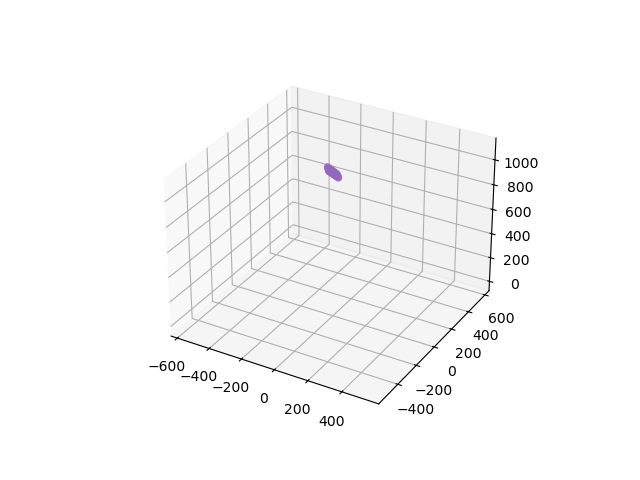

In [29]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(10):
    off = 8000 + i*10
    ax.scatter(all_triang[:, off, 0], all_triang[:, off, 1],all_triang[:, off, 2] )
# ax.scatter(all_triang[:, ::100, 0].flatten(), 
#            all_triang[:, ::100, 1].flatten(),
#            all_triang[:, ::100, 2].flatten() )
set_axes_equal(ax)

NameError: name 'set_axes_equal' is not defined